## <center> LGMVIP_DS_ September_23 Task 1-2 <center>
## <center> Stock Market Prediction and Forecasting Using LSTM <center>
## <center> By K. Pavan Kumar <center>

In [168]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
 #   for filename in filenames:
  #      print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## Importing Libraries:

In [209]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import math

## Importing Data

In [170]:
data=pd.read_csv('/kaggle/input/nse-tataglobal/NSE-TATAGLOBAL.csv')
data.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [171]:
# Converting 'Date' column to pandas date time series
data.Date=pd.to_datetime(data.Date)

In [172]:
# Setting Date column as the index
data.set_index('Date',inplace=True)

In [173]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2035 entries, 2018-09-28 to 2010-07-21
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Open                  2035 non-null   float64
 1   High                  2035 non-null   float64
 2   Low                   2035 non-null   float64
 3   Last                  2035 non-null   float64
 4   Close                 2035 non-null   float64
 5   Total Trade Quantity  2035 non-null   int64  
 6   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 127.2 KB


In [174]:
# Checking for Null Values in data frame
data.isnull().sum()

Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [175]:
# Sorting Datframe using Date index as reference.
data.sort_index(ascending=True,inplace=True)

## Preprocessing Data:

In [176]:
# MinMax Scaling function is used for scaling the desired variable
minmaxscaler=MinMaxScaler()

In [177]:
# 'Close' column is fit and transformed using MinMaxScaler function, so that values of 'Close' column
# would fall within range of [0,1]
data['Close']=minmaxscaler.fit_transform(data[['Close']])

## Splitting Train and Test Dataset:

In [178]:
# Defining 70% of length of datframe as 'Training Size'
training_size=int(len(data)*0.7)

In [179]:
# Assigning 'Close' column values in the form of np.array using reshape
# data['close'][:training_size].values means up to 70% of dataframe is assigned for train_data
train_data,test_data = data['Close'][:training_size].values.reshape(-1,1), data['Close'][training_size:].values.reshape(-1,1)

In [180]:
# Since train_data is numpy array, we can perform operations as below
train_data[:,0]

array([0.16584967, 0.16319444, 0.1621732 , ..., 0.15012255, 0.15747549,
       0.15277778])

In [181]:
# Function for creating Sequence of Inputs for Training LSTM
def create_sequence(data1,sequence_len):
    datax=[] # Creating an empty list datax
    datay=[] # Creating an empty list datay
    for i in range(len(data1)-sequence_len): #Since first Sequnce_len is left and data is considered after that
        x=data1[i:i+sequence_len,0] #as data1 to be input as np.array, 
                                    #thus forming np.array of shape (len(data1)-sequence_len,seq_len)
        y=data1[i+sequence_len,0] #the value present after sequence_len is 
                                  #assigned as target value, for which LSTM will have to match.
        datax.append(x)
        datay.append(y)
    return np.array(datax),np.array(datay) # Returning datax and datay

In [182]:
#specifying sequence length
seq_len=50

In [183]:
X_train,y_train=create_sequence(train_data,seq_len) #assigning values from create sequence to X_train and y_train
X_test,y_test=create_sequence(test_data,seq_len) #assigning values from create sequence to X_test and y_test

In [184]:
# the shape second dimension depends on sequence length you have chosen
X_train.shape

(1374, 50)

In [185]:
#Reshaping the 2D arrays to 3D arrays to avoid error while inputting to LSTM
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)

## Model Building

In [186]:
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.models import Sequential

In [187]:
model_close=Sequential()

In [188]:
model_close.add(LSTM(units=50,return_sequences=True,input_shape=(seq_len,1)))
model_close.add(LSTM(units=50,return_sequences=True))
model_close.add(LSTM(units=50))
model_close.add(Dense(1))

In [189]:
model_close.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_13 (LSTM)              (None, 50, 50)            10400     
                                                                 
 lstm_14 (LSTM)              (None, 50, 50)            20200     
                                                                 
 lstm_15 (LSTM)              (None, 50)                20200     
                                                                 
 dense_5 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [190]:
# Since this is continuous regression like problem, the loss or performance is based on 'mean_squared_error'
model_close.compile(optimizer='Adam',loss='mean_squared_error')

In [191]:
model_close.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=50,batch_size=32,verbose=1)

Epoch 1/50
43/43 [==============================] - 11s 115ms/step - loss: 0.0058 - val_loss: 0.0051
Epoch 2/50
43/43 [==============================] - 4s 87ms/step - loss: 0.0010 - val_loss: 0.0029
Epoch 3/50
43/43 [==============================] - 4s 84ms/step - loss: 9.2457e-04 - val_loss: 0.0028
Epoch 4/50
43/43 [==============================] - 4s 91ms/step - loss: 8.6835e-04 - val_loss: 0.0025
Epoch 5/50
43/43 [==============================] - 4s 85ms/step - loss: 7.7709e-04 - val_loss: 0.0060
Epoch 6/50
43/43 [==============================] - 4s 84ms/step - loss: 7.2899e-04 - val_loss: 0.0023
Epoch 7/50
43/43 [==============================] - 4s 86ms/step - loss: 6.8154e-04 - val_loss: 0.0037
Epoch 8/50
43/43 [==============================] - 4s 85ms/step - loss: 6.3338e-04 - val_loss: 0.0034
Epoch 9/50
43/43 [==============================] - 4s 84ms/step - loss: 6.1757e-04 - val_loss: 0.0046
Epoch 10/50
43/43 [==============================] - 4s 88ms/step - loss: 5.781

Text(0.5, 1.0, 'Original Plot of Closing Price of Stock')

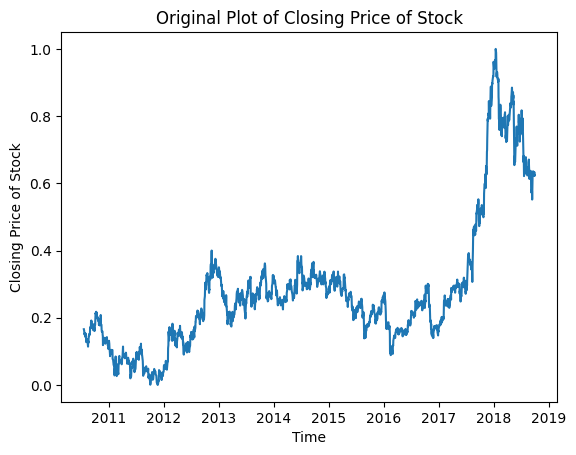

In [211]:
plt.plot(data.index,data['Close'])
plt.xlabel('Time')
plt.ylabel('Closing Price of Stock')
plt.title('Original Plot of Closing Price of Stock')

In [194]:
len(data),len(X_train),len(X_test),len(data.index[training_size+seq_len:])

(2035, 1374, 561, 561)

## Performance of Model:

In [202]:
y_test_pred=minmaxscaler.inverse_transform(model_close.predict(X_test))

18/18 [==============================] - 0s 24ms/step


In [210]:
from sklearn.metrics import mean_squared_error
print("The Mean Squared Error Between Test Value and Predicted Value is: ",mean_squared_error(y_test,y_test_pred))
print("The Root Mean Squared Error Between Test Value and Predicted Value is: ",math.sqrt(mean_squared_error(y_test,y_test_pred)))

The Mean Squared Error Between Test Value and Predicted Value is:  42758.945691768095
The Root Mean Squared Error Between Test Value and Predicted Value is:  206.78236310616072


43/43 [==============================] - 1s 24ms/step


Text(0.5, 1.0, 'Stock Market Closing Price Prediction Using Stacked LSTM')

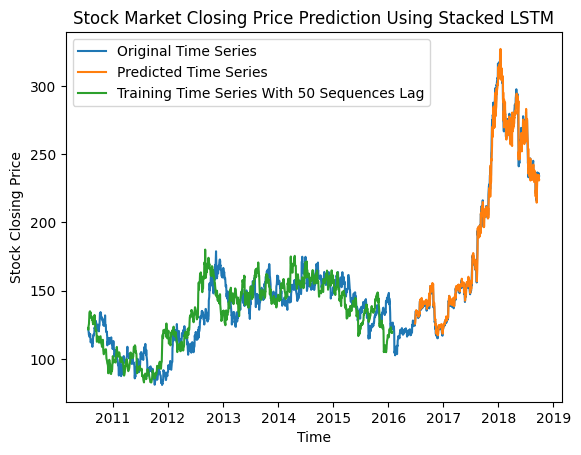

In [208]:
plt.plot(data.index,minmaxscaler.inverse_transform(data[['Close']]))
plt.plot(data.index[training_size+seq_len:],minmaxscaler.inverse_transform(model_close.predict(X_test)))
plt.plot(data.index[:training_size-seq_len],minmaxscaler.inverse_transform(model_close.predict(X_train)))
plt.xlabel('Time')
plt.ylabel('Stock Closing Price')
plt.legend('upperleft',labels=['Original Time Series','Predicted Time Series','Training Time Series With '+str(seq_len)+' Sequences Lag'])
plt.title('Stock Market Closing Price Prediction Using Stacked LSTM')